<a href="https://colab.research.google.com/github/Shiva-kalyanaram/Retail_store_weekly_sales_prediction/blob/main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Retail store weekly sales Prediction**

**Install Necessary packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1_fea = pd.read_csv('/content/Features_data_set.csv')
df2_sales = pd.read_csv('/content/sales_data_set.csv')
df3_stores = pd.read_csv('/content/stores_data_set.csv')


#above 3 dataframes, Store is a common column which available on all 3.
# Store, date, holiday are common on feature data and sales data, we have.
#After loading, we can see that feature data onlu had Null values.
# Merge the tables, and fill Null values

In [ ]:
df1_fea

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
df1_fea.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In which Feature data had more Null values.

In [ ]:
df2_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:
df2_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
df3_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df3_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [3]:
# Merge df2_sales with df3_stores on 'Store'
merged_df = pd.merge(df3_stores, df2_sales, on= 'Store', how='left' )
merged_df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False
421566,45,B,118221,98,05/10/2012,628.10,False
421567,45,B,118221,98,12/10/2012,1061.02,False
421568,45,B,118221,98,19/10/2012,760.01,False


In [4]:
df = pd.merge(merged_df, df1_fea, on= ['Store', 'Date'], how= 'left')
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,B,118221,98,05/10/2012,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,B,118221,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,B,118221,98,19/10/2012,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [5]:
df.isnull().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  bool   
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

Converting dtypes

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-6-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [42]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [7]:
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,B,118221,98,2012-05-10,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,B,118221,98,2012-12-10,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,B,118221,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [8]:
df.drop('IsHoliday_x', axis = 1, inplace = True)


In [45]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315,1,2010-05-02,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,1,2010-12-02,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,1,2010-05-03,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
df.fillna(0, inplace = True)

#filling all NA values as 0.0

In [10]:
df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

In [35]:
df.nunique()

Store               45
Type                 3
Size                40
Dept                81
Date               143
Weekly_Sales    359464
Temperature       3528
Fuel_Price         892
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
CPI               2145
Unemployment       349
IsHoliday_y          2
dtype: int64

In [ ]:
#Finding outliers and skewness

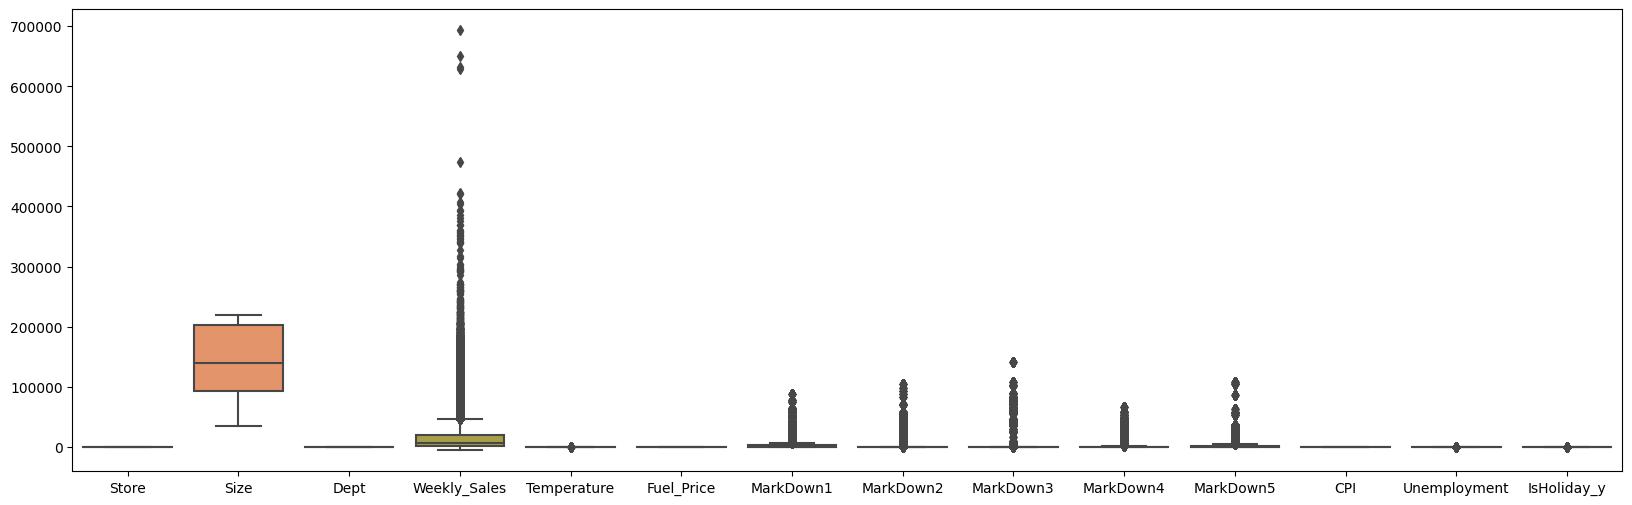

In [16]:
plt.figure(figsize = (20,6))
sns.boxplot(data = df)
plt.show()

Upon checking Outliers, it seems that weekly sales, temperature, Mark Down 1, 2, 3, 4, 5, Unemployment, Holiday are affected.

However, as our data is fully with the amount, there is chance for outliers in those columns.

So, as of now, we can keep the outliers and check if there is a problem

In [ ]:
# Normal Distribution check

In [56]:
df.head(3)

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year
0,1,A,151315,1,2010-05-02,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010
1,1,A,151315,1,2010-12-02,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010
2,1,A,151315,1,2010-02-19,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010


In [57]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Year'],
      dtype='object')

In [58]:
Numerical_col = ['Store', 'Size','Dept','Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']

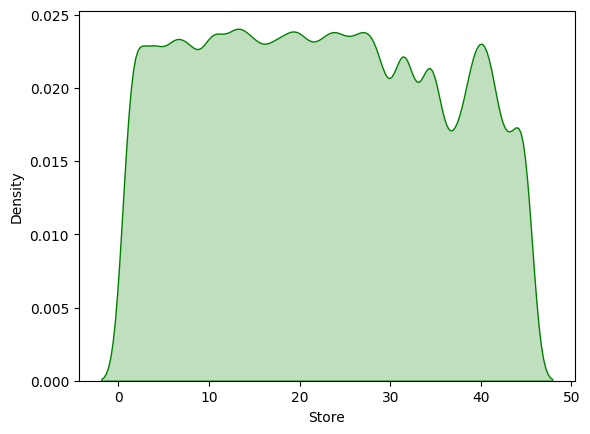

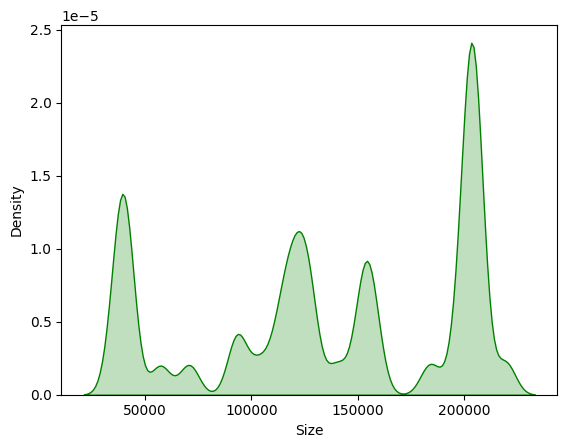

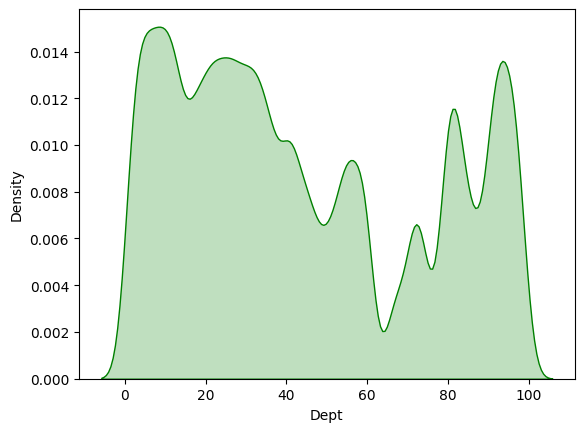

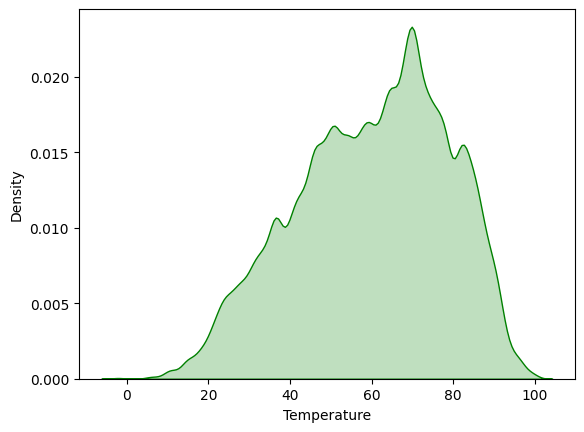

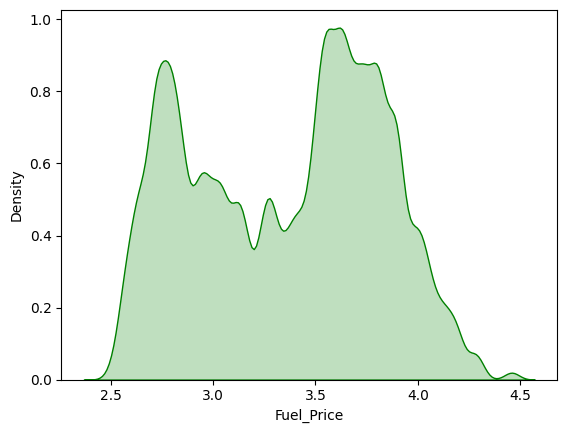

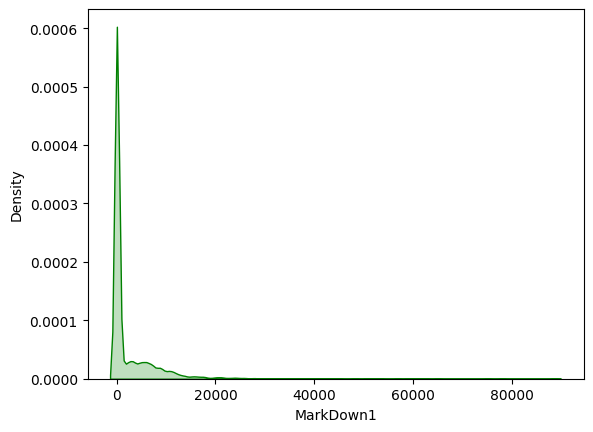

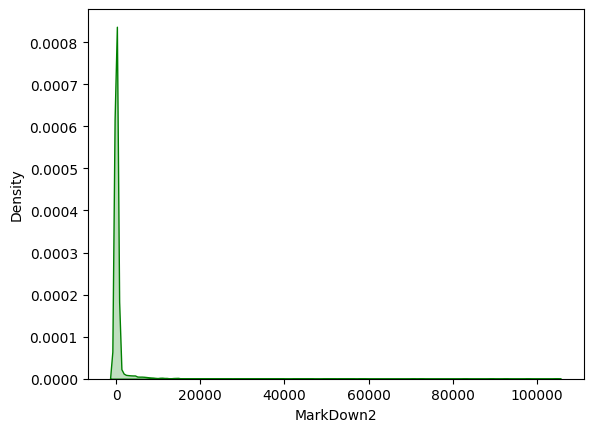

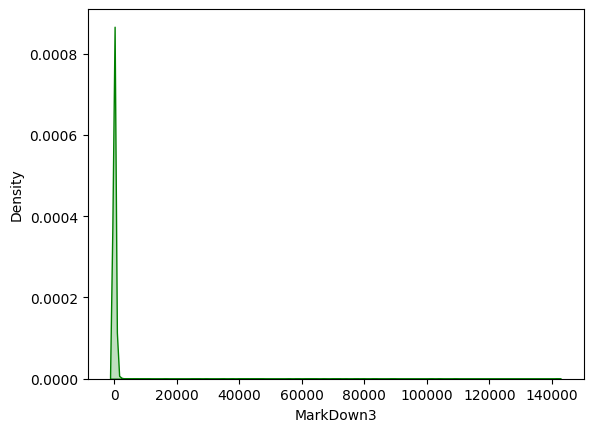

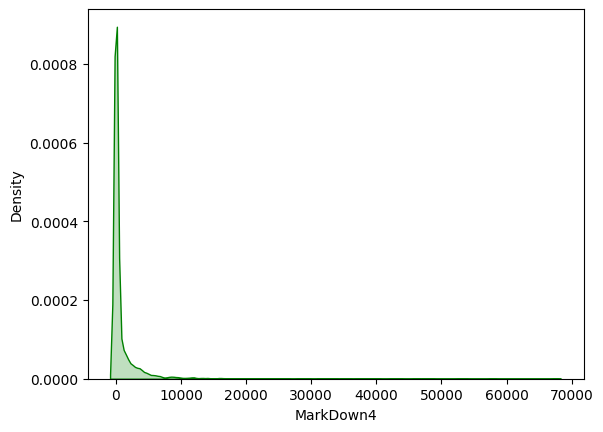

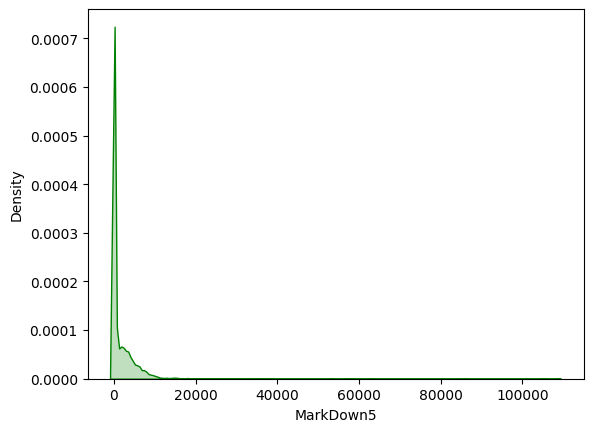

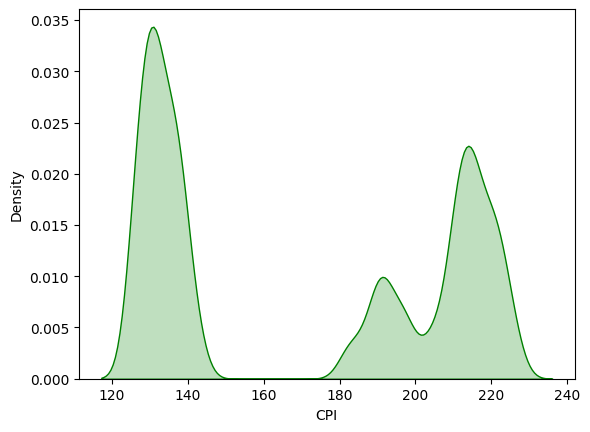

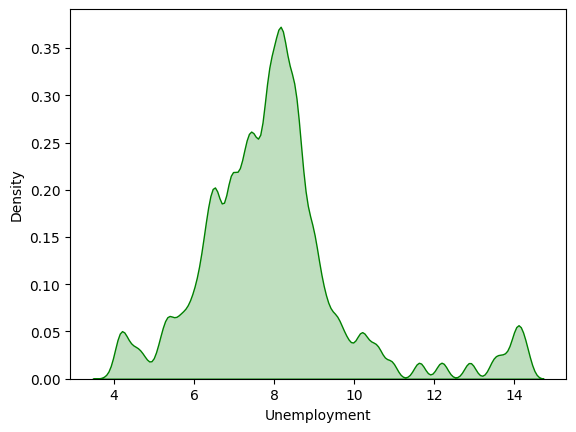

In [68]:
for i in Numerical_col:
    sns.kdeplot(data=df[i], fill=True, color='g')
    plt.show()

In [17]:
corr = ['Store', 'Size','Dept','Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']

<ipython-input-18-8841e2659ae7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")


<Axes: >

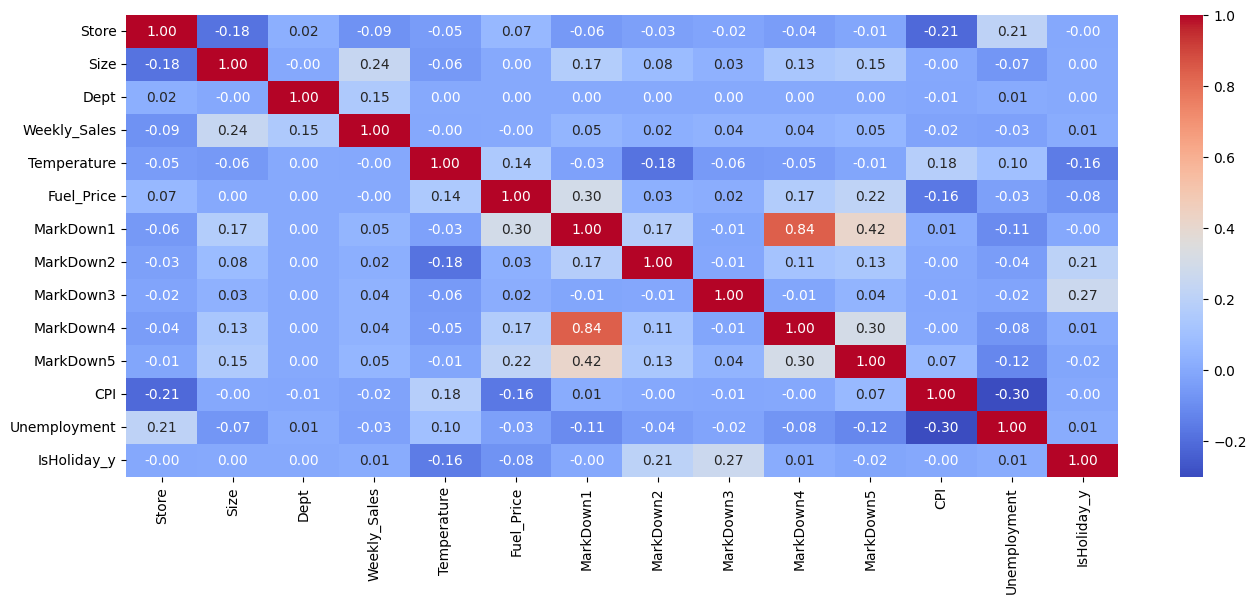

In [18]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")

Finding relationship between target and other columns

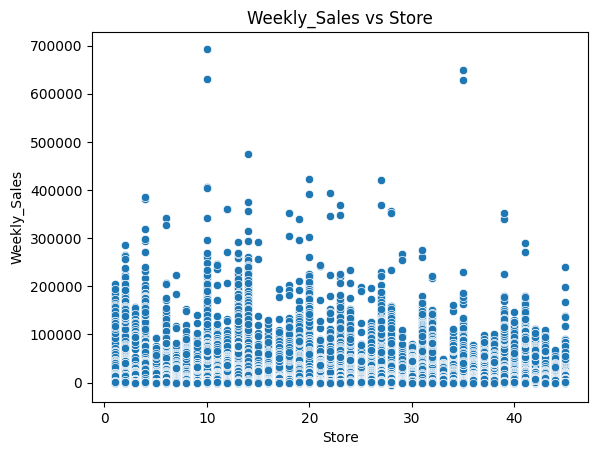

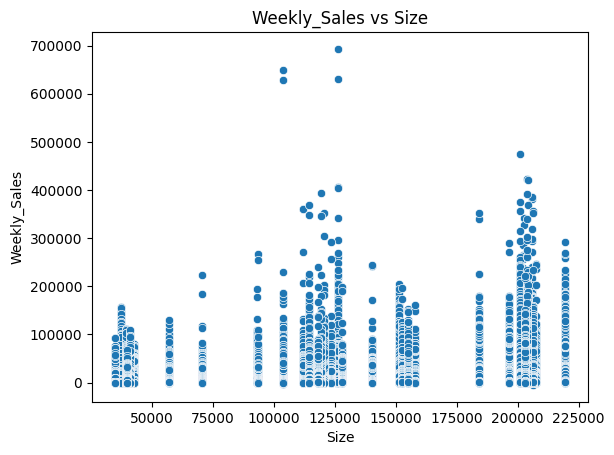

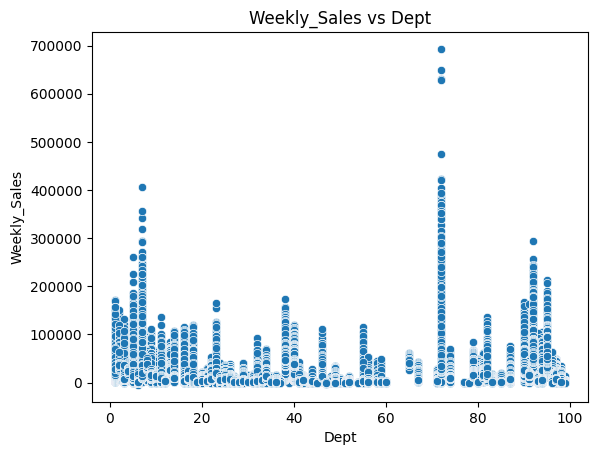

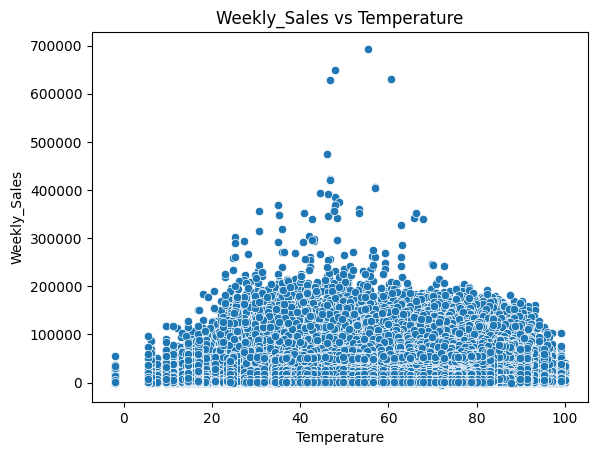

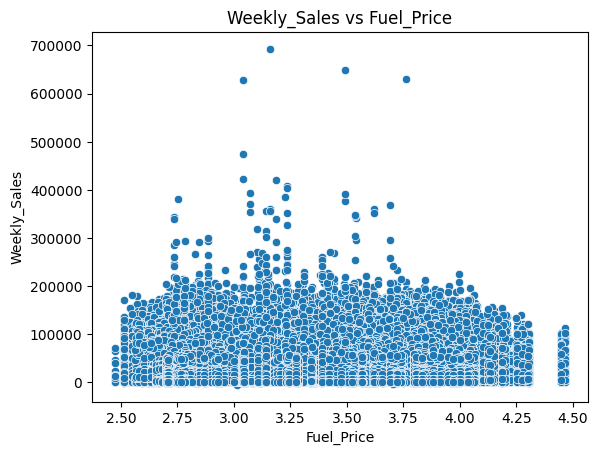

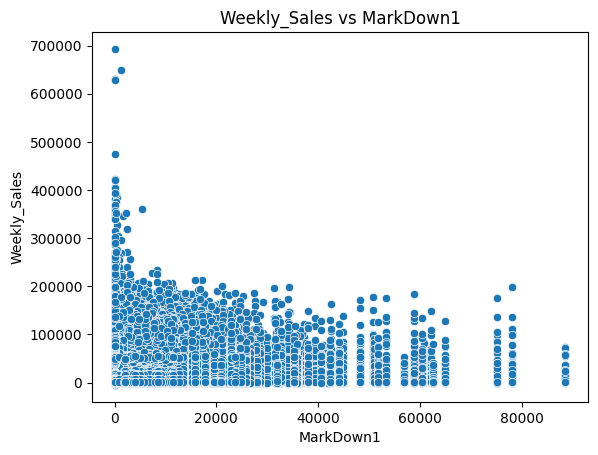

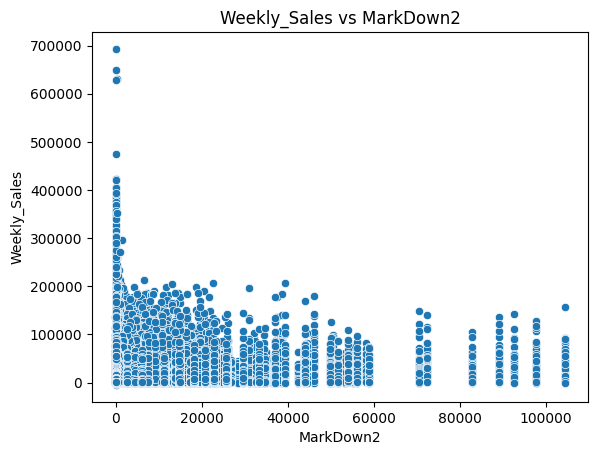

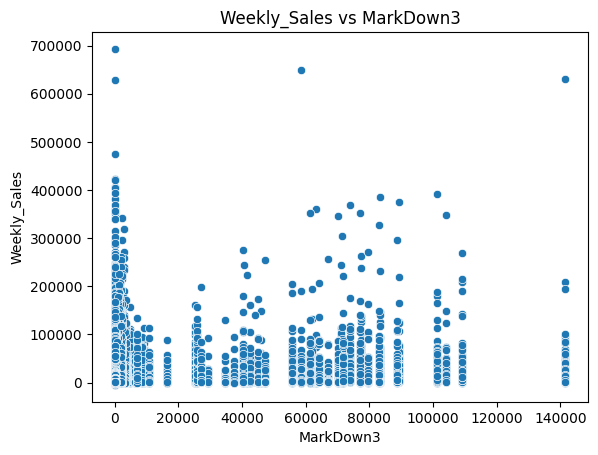

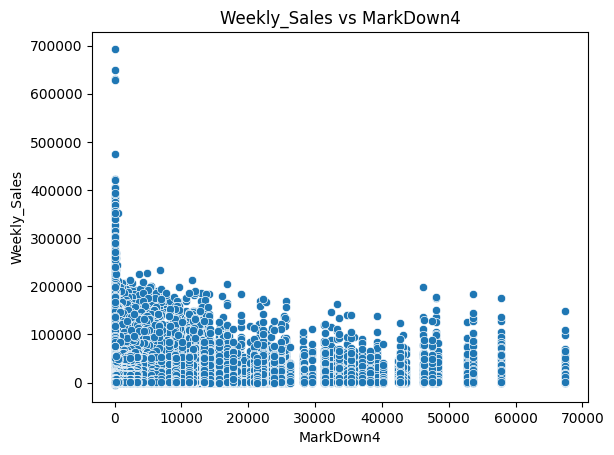

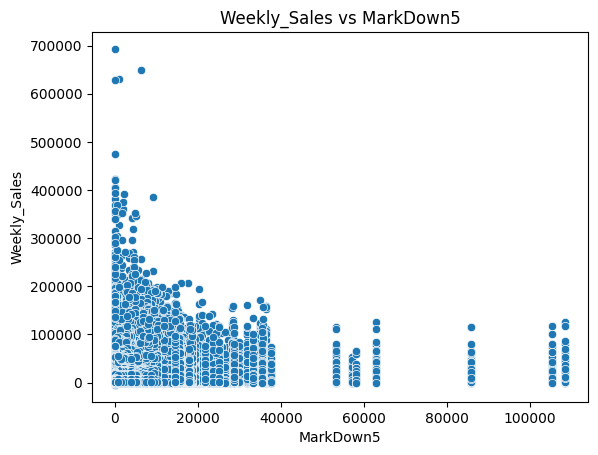

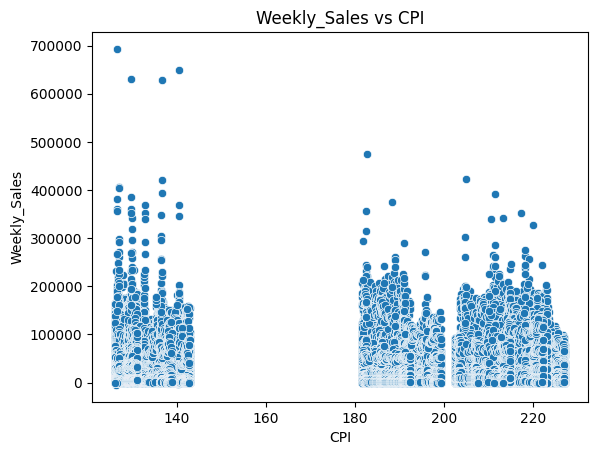

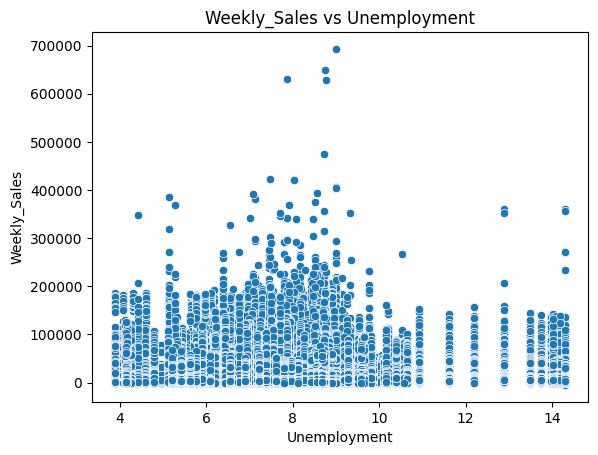

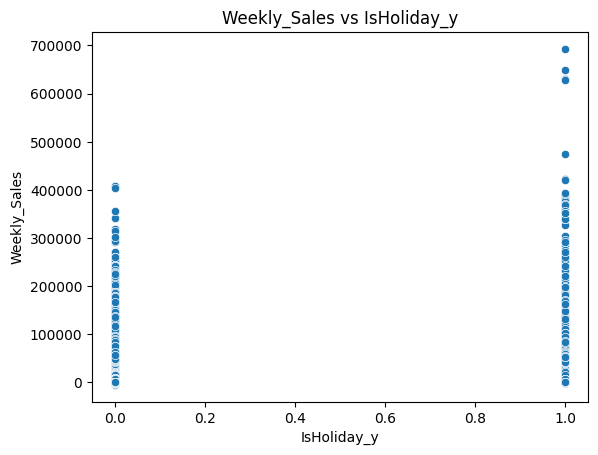

In [95]:
selected_columns =  ['Store', 'Size','Dept','Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y']


for column in selected_columns:
  sns.scatterplot(x = column, y = 'Weekly_Sales', data = df)
  plt.title(f'Weekly_Sales vs {column}')
  plt.xlabel(f'{column}')
  plt.ylabel('Weekly_Sales')
  plt.show()


In [12]:
# encoding the categorical columns

encoding_col_type = {
    'A' : 1,
    'B' : 2,
    'C' :3
    }

df['Type'] = df['Type'].map(encoding_col_type)



In [ ]:
encoding_col_hol = {
    'True' : 1,
    'Fale' : 2
    }

df['Type'] = df['IsHoliday_y'].map(encoding_col_hol)


In [13]:
df_1 = df.copy()

In [15]:
df_1.shape

(421570, 16)

In [135]:
df_1.to_csv("retail_clean.csv", index = False )

In [16]:
df_1['IsHoliday_y'] = df_1['IsHoliday_y'].astype(str)

In [17]:
df_1['IsHoliday_y'] = df_1['IsHoliday_y'].map({'True': 1, 'False': 0})

In [18]:
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1['Year'] = df_1['Date'].dt.year
df_1['Month'] = df_1['Date'].dt.month
df_1['Week'] = df_1['Date'].dt.week

<ipython-input-18-b002d7e0af28>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_1['Week'] = df_1['Date'].dt.week


In [19]:
re_arrange_column = ['Store', 'Type', 'Size', 'Dept', 'Year', 'Month','Week', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y','Weekly_Sales']

In [20]:
df_1 = df_1[re_arrange_column]

In [21]:
df_1.head()

,Store,Type,Size,Dept,Year,Month,Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Weekly_Sales
0,1,1,151315,1,2010,5,17,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,24924.50
1,1,1,151315,1,2010,12,48,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,46039.49
2,1,1,151315,1,2010,2,7,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,41595.55
3,1,1,151315,1,2010,2,8,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,19403.54
4,1,1,151315,1,2010,5,18,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,21827.90


Model Selection

In [ ]:
#Train, Test Split --

In [23]:
X = df_1.drop('Weekly_Sales', axis = 1)
y = df_1['Weekly_Sales']

In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((337256, 17), (84314, 17), (337256,), (84314,))

In [124]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import pandas as pd

models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'LGBMRegressor': LGBMRegressor(),
    'XGBRegressor': XGBRegressor()
}

# Create an empty list to store DataFrames for each model
dfs = []

# Loop through models and evaluate scores
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_value = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)

    # Create a DataFrame for the current model's results
    model_df = pd.DataFrame({
        'Model': [model_name],
        'R2 Score': [r2_value],
        'MSE Score': [MSE],
        'MAE Score': [MAE]
    })

    # Append the DataFrame to the list
    dfs.append(model_df)

# Concatenate all DataFrames into a single DataFrame
results_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
print(results_df)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2529
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 17
[LightGBM] [Info] Start training from score 15979.221909
                       Model  R2 Score     MSE Score     MAE Score
0      DecisionTreeRegressor  0.939117  3.174849e+07   2202.153941
1           LinearRegression  0.089494  4.748024e+08  14551.873248
2  GradientBoostingRegressor  0.738415  1.364091e+08   6918.654114
3        KNeighborsRegressor  0.344759  3.416893e+08  11384.471601
4              LGBMRegressor  0.903140  5.050964e+07   4214.225788
5               XGBRegressor  0.932767  3.506001e+07   3245.224909


In [ ]:
# as we can see the DecisionTreeRegressor had high R2 score, lets we can go with that model
# But before, lets calculate the train score too, to find the overfitting and underfitting.

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = DecisionTreeRegressor().fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# R2 score for the training set
R2_train_value = r2_score(y_train, y_train_pred)
print(f'R2 Score (Training): {R2_train_value:.4f}')

R2 Score (Training): 1.0000


In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform on test data (using the mean and standard deviation learned from training data)
X_test_scaled = scaler.transform(X_test)

# Create and train the model on the scaled data
model = DecisionTreeRegressor().fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R2 score
R2_score = r2_score(y_test, y_pred)
print(f'R2 Score (Test): {R2_score:.4f}')


R2 Score (Test): 0.9391


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [20, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse', 'friedman_mse']
}

# Create the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params, random_state=42)
best_dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Calculate R2 score
R2_score = r2_score(y_test, y_pred)
print(f'R2 Score (Test): {R2_score:.4f}')

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
272 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

R2 Score (Test): 0.9423
Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 10}


Yes, after tuning the hyperparameters, we got 94.23 as R2. So, we can consider this as generalized model.

In [33]:
import pickle

with open('best_dt_model.predict.pkl', 'wb') as f:
  pickle.dump(best_dt_model, f)

In [34]:
with open('best_dt_model.predict.pkl', 'rb') as f:
  bst_model = pickle.load(f)

In [31]:
df_1.head(2)

,Store,Type,Size,Dept,Year,Month,Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Weekly_Sales
0,1,1,151315,1,2010,5,17,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,24924.50
1,1,1,151315,1,2010,12,48,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,46039.49


In [ ]:
test_data = [[Store,	Type,	Size,	Dept,	Year,	Month,	Week,	Temperature,	Fuel_Price,	MarkDown1,	MarkDown2,	MarkDown3,	MarkDown4,	MarkDown5,	CPI	Unemployment,	IsHoliday_y]]

In [42]:
import numpy as np


data = np.array([[1,1,151315,1,2010,5,17,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0]])
print(bst_model.predict(data)[0])

19629.24714285714


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
